In [1]:
import os
os.environ['KERAS_BACKEND'] = 'theano'

In [2]:
import keras
from keras.layers import Convolution2D, Flatten, Dense, Input, Conv2DTranspose, BatchNormalization, Dropout
from keras.models import Model
from keras.regularizers import l2
import numpy as np
import keras.backend as K
K.image_dim_ordering()

Using Theano backend.


'tf'

In [78]:
from keras.losses import mean_squared_error as mse
from keras.losses import mean_absolute_error as mae
test = np.random.random((1,1024))
test_conv = test.reshape((test.shape[0], 1, 1, -1))
err = mae(test_conv, 0)
print err.eval()
err = mae(0, test_conv)
print err.eval()
def combined_loss(y_true, y_pred):
    return mse(y_true, y_pred) + 0.01*mae(y_true, y_pred)

[[[ 0.49324176]]]
[[[ 0.49324176]]]


In [4]:
os.sys.path.append('../Pilot2/P2B1/')
import p2b1_mol_AE as p2b1
import helper as hf

In [5]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [6]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = x_train.reshape(x_train.shape[0],-1)
X = scaler.fit_transform(x_train)
print np.max(x_train), np.min(x_train)

'''data = np.load('Pilot2/common/generate_datasets/test_16_outof_29.npz')
X = data['features']
nbrs = data['neighbors']'''
X.shape


/Users/karande1/.virtualenvs/karande_candle/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


255 0


(60000, 784)

In [49]:
#X = x_train
X = X.reshape(X.shape[0], 1, -1, 1)
y = np.copy(X)
print X.shape
nbrs = 0
molecular_input_dim = X.shape[2]*X.shape[3]*(nbrs+1)
molecular_hidden_layers = [64, 32, 16, 8]
'''
mol_AE_model, mol_latent_model = full_conv_mol_auto(bead_k_size=8, mol_k_size=2,
                                                    weights_path=None, input_shape=(1, molecular_input_dim, 1),
                                                    nonlinearity='relu',
                                                    hidden_layers=molecular_hidden_layers)
'''
mol_AE_model = p2b1.dense_auto(hidden_layers=molecular_hidden_layers)
#X = X.reshape(X.shape[0], 1, -1)
y = X.reshape(X.shape[0], -1)
print y.shape
'''mol_AE_model, mol_encoder = p2b1.conv_dense_mol_auto(bead_k_size=8, mol_k_size=2,
                                                     input_shape=(1, molecular_input_dim, 1), 
                                                     hidden_layers=molecular_hidden_layers, l2_reg=0.001,
                                                     drop=0.5)'''

(60000, 1, 784, 1)
(60000, 784)


'mol_AE_model, mol_encoder = p2b1.conv_dense_mol_auto(bead_k_size=8, mol_k_size=2,\n                                                     input_shape=(1, molecular_input_dim, 1), \n                                                     hidden_layers=molecular_hidden_layers, l2_reg=0.001,\n                                                     drop=0.5)'

In [50]:
mol_AE_model.compile(optimizer='adam', loss=combined_loss, metrics=['mse', 'mae'])
mol_AE_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_18 (Dense)             (None, 32)                544       
__________

In [72]:

#for i in range(10):
history = mol_AE_model.fit(y, y, epochs=5)

'''print mol_latent_model.predict(X[0:1])
print mol_latent_model.predict(X[45000:45001])'''


Epoch 1/5
60000/60000 [==============================] - 8s - loss: 0.0306 - mean_squared_error: 0.0298 - mean_absolute_error: 0.0863      

'print mol_latent_model.predict(X[0:1])\nprint mol_latent_model.predict(X[45000:45001])'

In [52]:
import matplotlib as mpl
mpl.use('nbagg')
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>


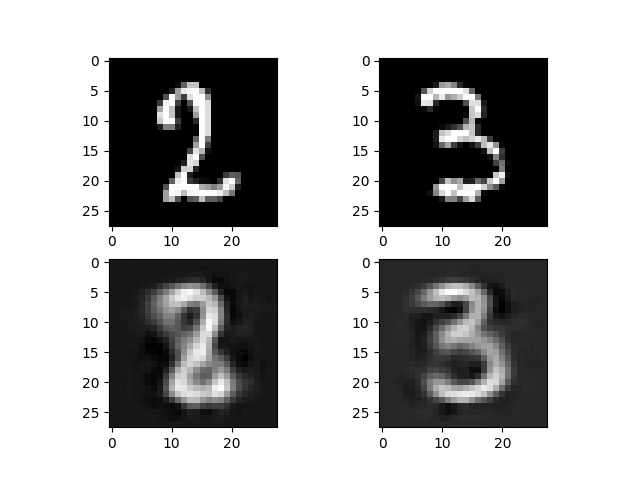

In [73]:
img_id = np.random.randint(60000)
in_1 = x_train[img_id:img_id+1].reshape(28,28)
out_1 = mol_AE_model.predict(y[img_id:img_id+1])

img_id = np.random.randint(60000)
in_2 = x_train[img_id:img_id+1].reshape(28,28)
out_2 = mol_AE_model.predict(y[img_id:img_id+1])

out_1 = np.squeeze(out_1).reshape(28,28)
out_2 = np.squeeze(out_2).reshape(28,28)


plt.subplot(221)
plt.imshow(in_1, cmap='gray')

plt.subplot(222)
plt.imshow(in_2, cmap='gray')

plt.subplot(223)
plt.imshow(out_1, cmap='gray')

plt.subplot(224)
plt.imshow(out_2, cmap='gray')

plt.show()


<IPython.core.display.Javascript object>


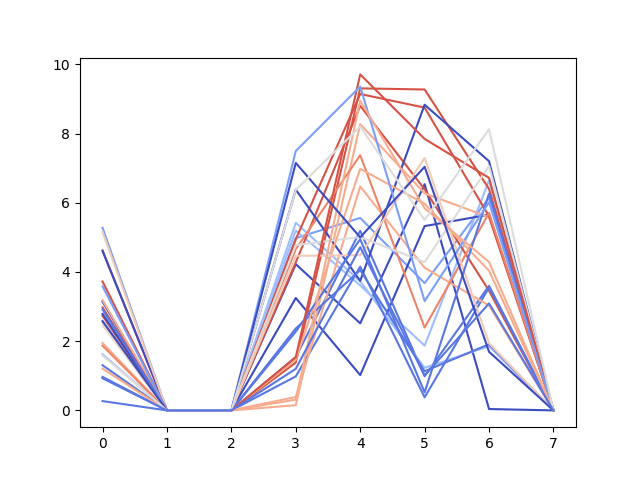

In [74]:
plt.figure()
col = mpl.cm.coolwarm
for i in range(25):
    img_id = np.random.randint(60000)
    latent1 = p2b1.get_activations(mol_AE_model, 4, y[img_id:img_id+1])
    #latent2 = mol_encoder.predict(X[43000:43001])
    
    plt.plot(np.squeeze(latent1), c=col(y_train[img_id]/10.0))
    #plt.plot(np.squeeze(latent2))
plt.show()

In [66]:
col = mpl.cm.hot
col.

In [11]:
test = next(gen)

In [18]:
len(test)

2